###Deep Learning Lab Manual CAI2503, Prepared By IC: Pakruddin.B, Asst.Prof., PSCSE,PU. 2025-26

### Lab 6: Hyperparameter Tuning in Neural Networks
# -----------------------------------------------
Objective: Compare the effect of learning rate, batch size, and hidden units

Dataset: MNIST

Duration: ~2 hours

###What Students Will Learn
How changing hidden units affects model capacity.

How learning rate impacts convergence speed and stability.

How batch size influences training time and performance.

How to compare multiple experiments systematically.

###Expected Outputs
Validation accuracy curves comparing configurations.

Printed table showing final test accuracy for each config.

Understanding trade-offs in model design and training settings.



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


In [3]:
# 2. Function to build model with hyperparameters
def build_mlp(hidden_units, learning_rate):
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# 3. Hyperparameter configurations to test
configs = [
    {'hidden_units': 64,  'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 64},
    {'hidden_units': 128, 'learning_rate': 0.01,  'batch_size': 64},
    {'hidden_units': 256, 'learning_rate': 0.001, 'batch_size': 128}
]

history_results = {}
test_results = {}

In [5]:
# 4. Train and evaluate models
for cfg in configs:
    print(f"\nTraining with {cfg}")
    model = build_mlp(cfg['hidden_units'], cfg['learning_rate'])
    history = model.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=5,  # small for lab
                        batch_size=cfg['batch_size'],
                        verbose=0)
    history_results[str(cfg)] = history.history
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_results[str(cfg)] = test_acc
    print(f"Test Accuracy: {test_acc:.4f}")


Training with {'hidden_units': 64, 'learning_rate': 0.001, 'batch_size': 32}


2025-09-07 13:39:12.365794: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Test Accuracy: 0.9718

Training with {'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 64}


Test Accuracy: 0.9728

Training with {'hidden_units': 128, 'learning_rate': 0.01, 'batch_size': 64}


Test Accuracy: 0.9635

Training with {'hidden_units': 256, 'learning_rate': 0.001, 'batch_size': 128}
Test Accuracy: 0.9750


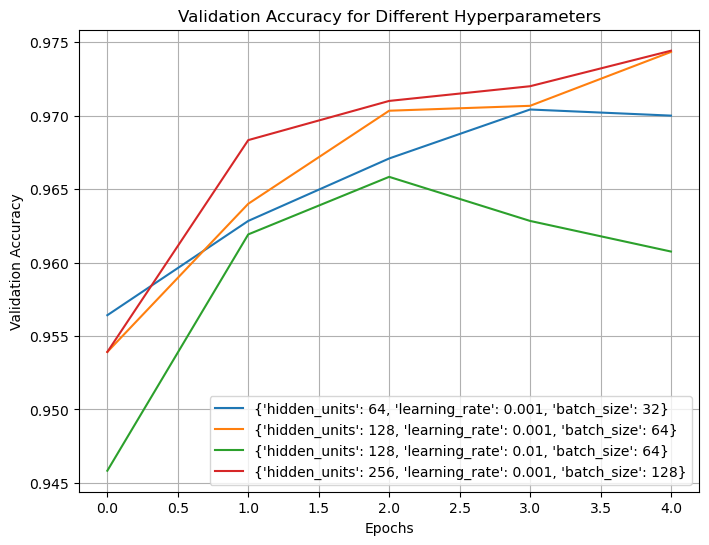

In [6]:
# 5. Plot validation accuracy curves
plt.figure(figsize=(8, 6))
for cfg, hist in history_results.items():
    plt.plot(hist['val_accuracy'], label=cfg)
plt.title("Validation Accuracy for Different Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 6. Final comparison table
print("\nFinal Test Accuracy Comparison:")
for cfg, acc in test_results.items():
    print(f"{cfg}: {acc:.4f}")



Final Test Accuracy Comparison:
{'hidden_units': 64, 'learning_rate': 0.001, 'batch_size': 32}: 0.9718
{'hidden_units': 128, 'learning_rate': 0.001, 'batch_size': 64}: 0.9728
{'hidden_units': 128, 'learning_rate': 0.01, 'batch_size': 64}: 0.9635
{'hidden_units': 256, 'learning_rate': 0.001, 'batch_size': 128}: 0.9750
